## Visualisasi semua jalur dari kota Purwokerto ke kota Yogyakarta

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
v = {"Purwokerto", "Kebumen", "Purworejo", "Kulonprogo",
     "Yogyakarta", "Banjarnegara", "Wonosobo", "Temanggung",
     "Magelang", "Sleman", "Ranosari", "Borobudur"}

e =[("Purwokerto","Kebumen", 67),("Kebumen","Purworejo", 48),
    ("Purworejo","Kulonprogo", 40),("Kulonprogo","Yogyakarta", 28),
    ("Purwokerto","Banjarnegara", 41),("Banjarnegara","Wonosobo", 47),
    ("Wonosobo","Temanggung", 30),("Temanggung","Magelang",40),
    ("Magelang","Sleman", 34),("Sleman","Yogyakarta", 13),
    ("Wonosobo","Ranosari", 28),("Ranosari","Borobudur", 35),
    ("Borobudur","Kulonprogo", 43)]

In [ ]:
g = nx.DiGraph()
g.add_nodes_from(v)
g.add_weighted_edges_from(e)

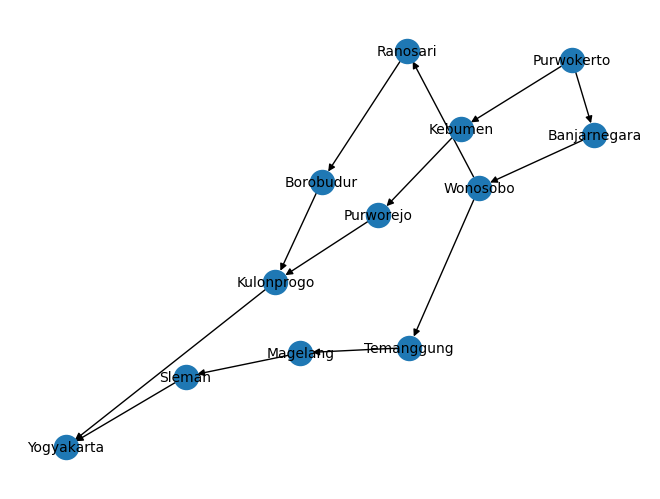

In [ ]:
nx.draw_spring(g, with_labels = True, font_size = 10)

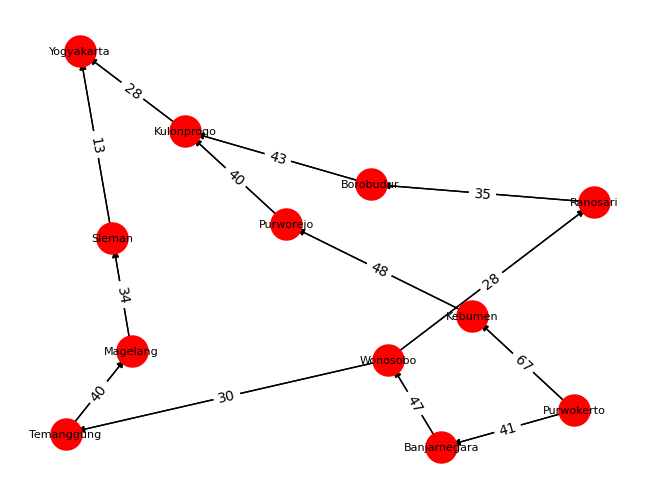

In [ ]:
pos = nx.spring_layout(g)

nx.draw(g, pos)

nx.draw_networkx_nodes(g, pos, node_size=500, node_color = "r")
nx.draw_networkx_labels(g, pos, font_size=8, font_family="sans-serif")
nx.draw_networkx_edges(g, pos, edgelist=e, edge_color="k", arrowsize=10)
weight = nx.get_edge_attributes(g, "weight")
nx.draw_networkx_edge_labels(g, pos, edge_labels=weight, font_size= 10)

plt.show()

# Jalur Terpendek **Purwokerto** - **Yogyakarta**

In [ ]:
a = nx.shortest_path(g, "Purwokerto", "Yogyakarta", method="dijkstra")
print(a)

['Purwokerto', 'Kebumen', 'Purworejo', 'Kulonprogo', 'Yogyakarta']


In [ ]:
x = nx.single_source_dijkstra(g, "Purwokerto", "Yogyakarta")
y = nx.shortest_path_length(g,"Purwokerto", "Yogyakarta")

print("Total Panjang jalur terpendek adalah",x)
print("Jumlah lintasan yang dilalui adalah", y)

Total Panjang jalur terpendek adalah (183, ['Purwokerto', 'Kebumen', 'Purworejo', 'Kulonprogo', 'Yogyakarta'])
Jumlah lintasan yang dilalui adalah 4


In [ ]:
def jarak_terpendek(data_jalur, awal, akhir, jalur=[]):
  jalur = jalur + [awal]
  if awal == akhir:
    return jalur
  if not awal and akhir in data_jalur:
    return None
  jarak = None

  for node in data_jalur[awal]:
    if node not in jalur:
      jalurbaru = jarak_terpendek(data_jalur, node, akhir, jalur)
      if jalurbaru:
        if not jarak or len (jalurbaru) < len(jalur):
          jarak = jalurbaru
  return jarak

In [ ]:
jarak_terpendek(g, "Purwokerto", "Yogyakarta")

['Purwokerto', 'Kebumen', 'Purworejo', 'Kulonprogo', 'Yogyakarta']

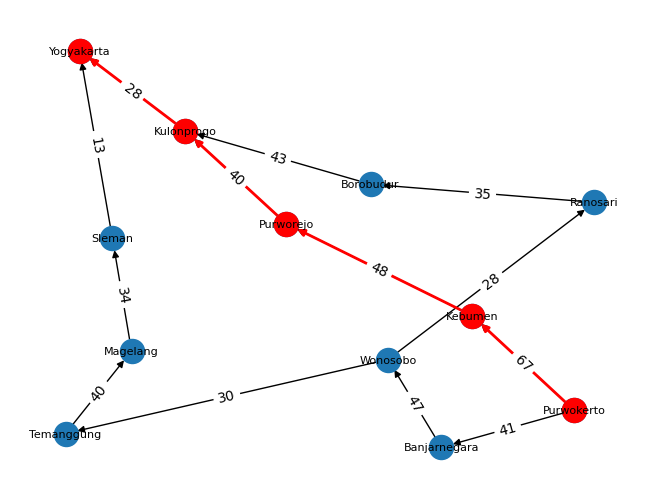

In [ ]:
nx.draw(g, pos)
path = nx.shortest_path(g, source="Purwokerto", target="Yogyakarta")
path_edges = list(zip(path, path[1:]))

nx.draw_networkx_nodes(g, pos, nodelist=path, node_color='r')
nx.draw_networkx_edges(g, pos, edgelist=path_edges, edge_color='r', width=2)
nx.draw_networkx_labels(g, pos, font_size=8, font_family="sans-serif")
weight = nx.get_edge_attributes(g, "weight")
nx.draw_networkx_edge_labels(g, pos, edge_labels=weight, font_size= 10)

plt.show()